In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colunas=['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO',
        'TP_SEXO','TP_ENSINO', 'TP_COR_RACA','SG_UF_ESC',
        'Q001','Q002','Q006', 'Q025']

In [ ]:
df_enem=pd.read_csv('MICRODADOS_ENEM_2020.csv', sep=';', usecols=colunas ,error_bad_lines=False, index_col=False, encoding='latin-1', dtype='unicode')

In [4]:
df_enem.describe()

,TP_SEXO,TP_COR_RACA,TP_ENSINO,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025
count,5783109,5783109,1303446,904569,2597440,2754140,2754140,2597440,2754140,5687143,5687143,5687143,5687143
unique,2,6,2,27,4779,4882,4578,6233,50,8,8,17,2
top,F,3,1,SP,430.2,0,0,402.4,560,E,E,B,B
freq,3468805,2720485,1294245,167183,1363,5067,2349,1029,170075,1444832,1796085,1884219,4634811


In [5]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783109 entries, 0 to 5783108
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TP_SEXO          object
 1   TP_COR_RACA      object
 2   TP_ENSINO        object
 3   SG_UF_ESC        object
 4   NU_NOTA_CN       object
 5   NU_NOTA_CH       object
 6   NU_NOTA_LC       object
 7   NU_NOTA_MT       object
 8   NU_NOTA_REDACAO  object
 9   Q001             object
 10  Q002             object
 11  Q006             object
 12  Q025             object
dtypes: object(13)
memory usage: 573.6+ MB


In [6]:
df_enem['TP_COR_RACA'].unique()

array(['2', '3', '1', '0', '4', '5'], dtype=object)

In [7]:
df_enem.isna().sum()

TP_SEXO                  0
TP_COR_RACA              0
TP_ENSINO          4479663
SG_UF_ESC          4878540
NU_NOTA_CN         3185669
NU_NOTA_CH         3028969
NU_NOTA_LC         3028969
NU_NOTA_MT         3185669
NU_NOTA_REDACAO    3028969
Q001                 95966
Q002                 95966
Q006                 95966
Q025                 95966
dtype: int64

In [8]:
df_enem['NU_NOTA_CN'] = df_enem['NU_NOTA_CN'].astype(float).fillna(0)
df_enem['NU_NOTA_CH'] = df_enem['NU_NOTA_CH'].astype(float).fillna(0)
df_enem['NU_NOTA_LC'] = df_enem['NU_NOTA_LC'].astype(float).fillna(0)
df_enem['NU_NOTA_MT'] = df_enem['NU_NOTA_MT'].astype(float).fillna(0)
df_enem['NU_NOTA_REDACAO'] = df_enem['NU_NOTA_REDACAO'].astype(float).fillna(0)
df_enem['TP_SEXO'] = df_enem['TP_SEXO'].fillna(0)
df_enem['TP_ENSINO'] = df_enem['TP_ENSINO'].fillna(0)
df_enem['SG_UF_ESC'] = df_enem['SG_UF_ESC'].fillna(0)
df_enem['Q001'] = df_enem['Q001'].astype(str).fillna('S/R')
df_enem['Q002'] = df_enem['Q002'].astype(str).fillna('S/R')
df_enem['Q006'] = df_enem['Q006'].astype(str).fillna('S/R')
df_enem['Q025'] = df_enem['Q025'].astype(str).fillna('S/R')
df_enem['Q001'].loc[(df_enem['Q001'] == 'nan')] = 'S/R'
df_enem['Q002'].loc[(df_enem['Q002'] == 'nan')] = 'S/R'
df_enem['Q006'].loc[(df_enem['Q006'] == 'nan')] = 'S/R'
df_enem['Q025'].loc[(df_enem['Q025'] == 'nan')] = 'S/R'

C:\Users\vitor\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
df_enem.isna().sum()

TP_SEXO            0
TP_COR_RACA        0
TP_ENSINO          0
SG_UF_ESC          0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_MT         0
NU_NOTA_REDACAO    0
Q001               0
Q002               0
Q006               0
Q025               0
dtype: int64

In [10]:
df_enem['SG_UF_RESIDENCIA']= df_enem['SG_UF_ESC']

In [11]:
uf_sul = ['RS', 'SC', 'PR']
uf_sudeste = ['SP', 'RJ', 'ES', 'MG']
uf_nordeste = ['BA', 'SE', 'AL','PE','PB','RN', 'CE', 'PI', 'MA']
uf_centro_oeste = ['MT', 'MS', 'GO','DF']
uf_norte = ['TO','PA','AM','AP','AC','RO','RR']

df_enem.SG_UF_RESIDENCIA.loc[(df_enem['SG_UF_RESIDENCIA'].isin(uf_sul))] = 'Sul'
df_enem.SG_UF_RESIDENCIA.loc[(df_enem['SG_UF_RESIDENCIA'].isin(uf_sudeste))] = 'Sudeste'
df_enem.SG_UF_RESIDENCIA.loc[(df_enem['SG_UF_RESIDENCIA'].isin(uf_nordeste))] = 'Nordeste'
df_enem.SG_UF_RESIDENCIA.loc[(df_enem['SG_UF_RESIDENCIA'].isin(uf_centro_oeste))] = 'Centro-Oeste'
df_enem.SG_UF_RESIDENCIA.loc[(df_enem['SG_UF_RESIDENCIA'].isin(uf_norte))] = 'Norte'

In [12]:
df_enem['Soma_Notas']=df_enem['NU_NOTA_CN']+df_enem['NU_NOTA_CH']+df_enem['NU_NOTA_LC']+df_enem['NU_NOTA_MT']+df_enem['NU_NOTA_REDACAO']

In [13]:
df_remove = df_enem.loc[(df_enem['TP_SEXO']== 0)]

df_enem.drop(df_remove.index, inplace=True)

df_enem['TP_SEXO'].unique()

array(['F', 'M'], dtype=object)

In [14]:
df_remove = df_enem.loc[(df_enem['SG_UF_RESIDENCIA']== 0)]

df_enem.drop(df_remove.index, inplace=True)

df_enem['SG_UF_RESIDENCIA'].unique()

array(['Nordeste', 'Sudeste', 'Norte', 'Centro-Oeste', 'Sul'],
      dtype=object)

In [15]:
df_enem

,TP_SEXO,TP_COR_RACA,TP_ENSINO,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,SG_UF_RESIDENCIA,Soma_Notas
2,F,3,1,BA,0.0,0.0,0.0,0.0,0.0,B,C,B,A,Nordeste,0.0
3,M,3,1,SP,620.8,675.0,624.2,759.4,760.0,S/R,S/R,S/R,S/R,Sudeste,3439.4
25,F,2,1,BA,0.0,0.0,0.0,0.0,0.0,S/R,S/R,S/R,S/R,Nordeste,0.0
36,F,3,1,AM,486.9,509.7,532.3,433.9,620.0,E,E,B,A,Norte,2582.8
65,F,3,1,PI,516.8,565.7,567.7,384.2,880.0,A,C,B,A,Nordeste,2914.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783103,M,1,1,SP,547.3,613.3,596.4,469.1,660.0,S/R,S/R,S/R,S/R,Sudeste,2886.1
5783104,F,1,1,CE,508.3,661.4,658.3,725.7,900.0,E,G,G,B,Nordeste,3453.7
5783105,M,1,1,MS,570.5,646.1,607.2,719.5,660.0,S/R,S/R,S/R,S/R,Centro-Oeste,3203.3
5783107,F,1,1,MT,0.0,0.0,0.0,0.0,0.0,G,G,N,B,Centro-Oeste,0.0


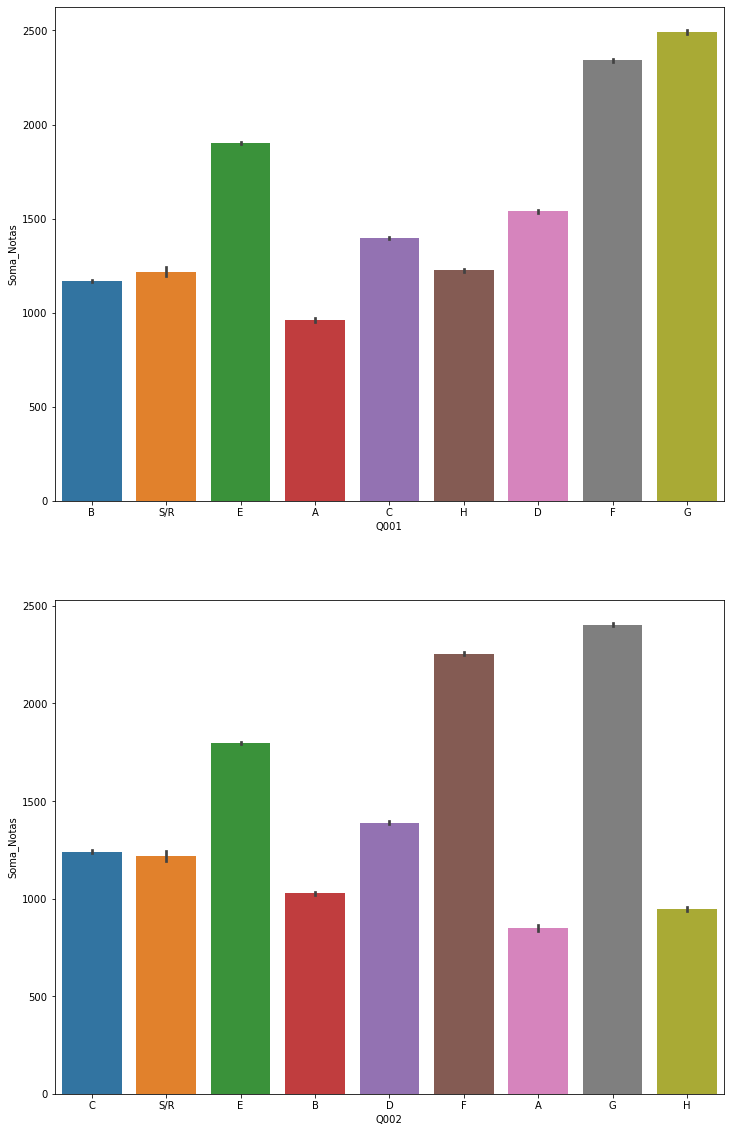

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(12, 20))
sns.barplot(data=df_enem, x='Q001', y='Soma_Notas', ax=ax[0])
sns.barplot(data=df_enem, x='Q002', y='Soma_Notas', ax=ax[1])
ax[0].set(xlabel="Q001", ylabel="Soma_Notas")
ax[1].set(xlabel="Q002", ylabel="Soma_Notas");

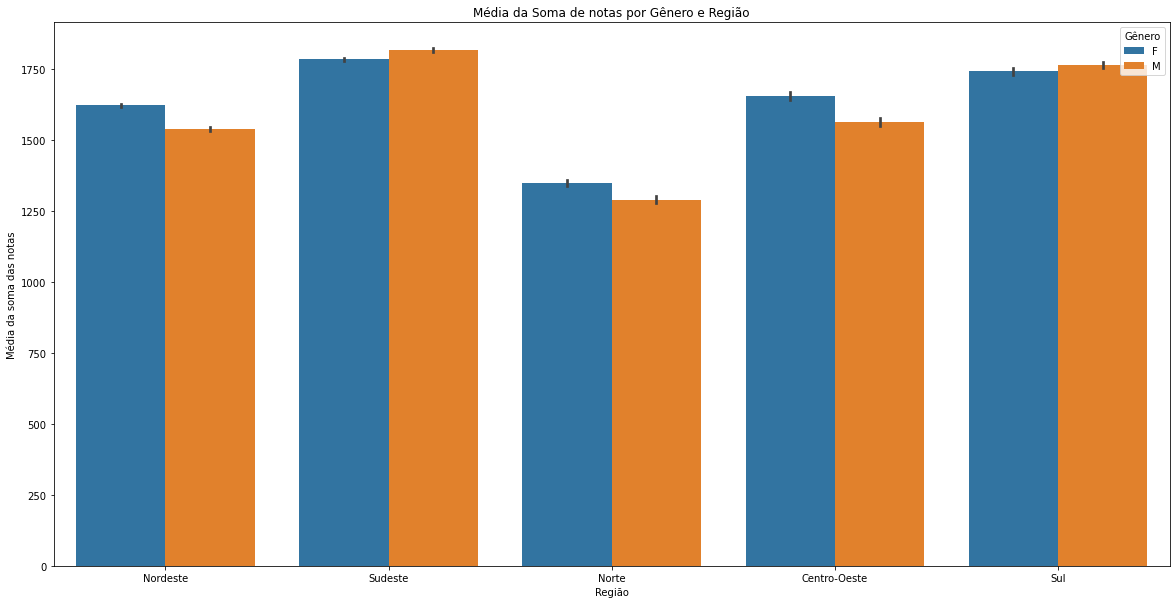

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_enem, x='SG_UF_RESIDENCIA', y='Soma_Notas', hue='TP_SEXO');
plt.title('Média da Soma de notas por Gênero e Região')
plt.ylabel('Média da soma das notas')
plt.xlabel('Região')
plt.legend(loc='upper right', title='Gênero');

In [88]:
df_enem.sort_values(by=['Q001','Q002'], inplace=True)

In [19]:
# Q001.Pai
# A	Nunca estudou.
# B	Não completou a 4ª série/5º ano do Ensino Fundamental.
# C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
# D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
# E	Completou o Ensino Médio, mas não completou a Faculdade.
# F	Completou a Faculdade, mas não completou a Pós-graduação.
# G	Completou a Pós-graduação.
# H	Não sei.
# Q002.Mãe
# A	Nunca estudou.
# B	Não completou a 4ª série/5º ano do Ensino Fundamental.
# C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
# D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
# E	Completou o Ensino Médio, mas não completou a Faculdade.
# F	Completou a Faculdade, mas não completou a Pós-graduação.
# G	Completou a Pós-graduação.
# H	Não sei.


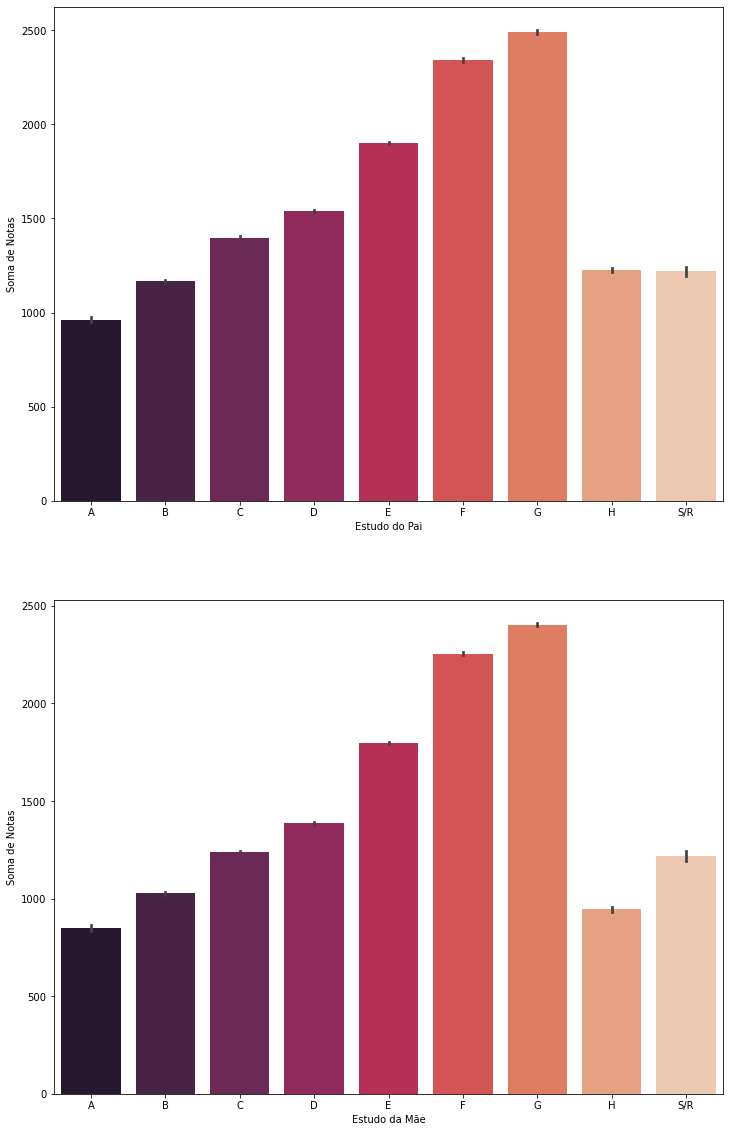

In [89]:
fig, ax = plt.subplots(2, 1, figsize=(12, 20))
sns.barplot(data=df_enem, x='Q001', y='Soma_Notas',palette='rocket', ax=ax[0])
sns.barplot(data=df_enem, x='Q002', y='Soma_Notas', palette='rocket',ax=ax[1])
ax[0].set(xlabel="Estudo do Pai", ylabel="Soma de Notas")
ax[1].set(xlabel="Estudo da Mãe", ylabel="Soma de Notas");

In [69]:
df_enem.sort_values(by=['Q006'], inplace=True)

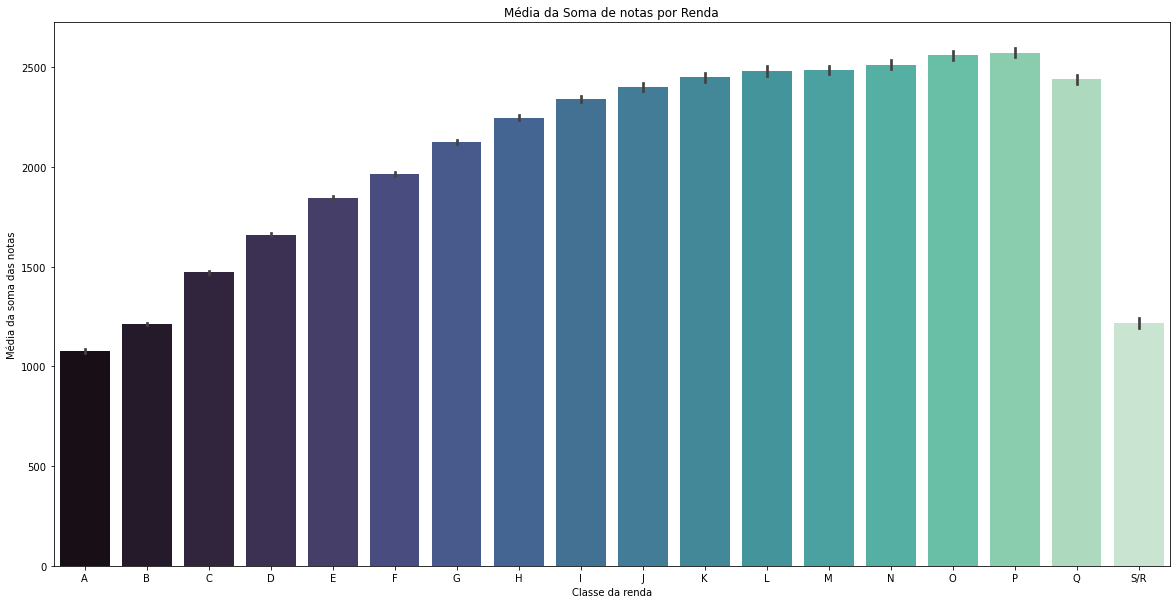

In [71]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_enem, x='Q006', y='Soma_Notas',palette='mako')
plt.title('Média da Soma de notas por Renda')
plt.ylabel('Média da soma das notas')
plt.xlabel('Classe da renda');

In [23]:
# A	Nenhuma Renda
# B	Até R$ 1.045,00
# C	De R$ 1.045,01 até R$ 1.567,50
# D	De R$ 1.567,51 até R$ 2.090,00
# E	De R$ 2.090,01 até R$ 2.612,50
# F	De R$ 2.612,51 até R$ 3.135,00
# G	De R$ 3.135,01 até R$ 4.180,00
# H	De R$ 4.180,01 até R$ 5.225,00
# I	De R$ 5.225,01 até R$ 6.270,00
# J	De R$ 6.270,01 até R$ 7.315,00
# K	De R$ 7.315,01 até R$ 8.360,00
# L	De R$ 8.360,01 até R$ 9.405,00
# M	De R$ 9.405,01 até R$ 10.450,00
# N	De R$ 10.450,01 até R$ 12.540,00
# O	De R$ 12.540,01 até R$ 15.675,00
# P	De R$ 15.675,01 até R$ 20.900,00
# Q	Acima de R$ 20.900,00

In [24]:
df_enem.sort_index(inplace=True)
df_enem

,TP_SEXO,TP_COR_RACA,TP_ENSINO,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,SG_UF_RESIDENCIA,Soma_Notas
2,F,3,1,BA,0.0,0.0,0.0,0.0,0.0,B,C,B,A,Nordeste,0.0
3,M,3,1,SP,620.8,675.0,624.2,759.4,760.0,S/R,S/R,S/R,S/R,Sudeste,3439.4
25,F,2,1,BA,0.0,0.0,0.0,0.0,0.0,S/R,S/R,S/R,S/R,Nordeste,0.0
36,F,3,1,AM,486.9,509.7,532.3,433.9,620.0,E,E,B,A,Norte,2582.8
65,F,3,1,PI,516.8,565.7,567.7,384.2,880.0,A,C,B,A,Nordeste,2914.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783103,M,1,1,SP,547.3,613.3,596.4,469.1,660.0,S/R,S/R,S/R,S/R,Sudeste,2886.1
5783104,F,1,1,CE,508.3,661.4,658.3,725.7,900.0,E,G,G,B,Nordeste,3453.7
5783105,M,1,1,MS,570.5,646.1,607.2,719.5,660.0,S/R,S/R,S/R,S/R,Centro-Oeste,3203.3
5783107,F,1,1,MT,0.0,0.0,0.0,0.0,0.0,G,G,N,B,Centro-Oeste,0.0


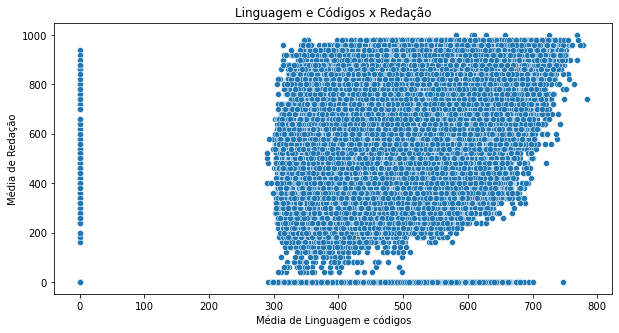

In [73]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_enem, x='NU_NOTA_LC', y='NU_NOTA_REDACAO',palette='mako');
plt.title('Linguagem e Códigos x Redação')
plt.ylabel('Média de Redação')
plt.xlabel('Média de Linguagem e códigos');

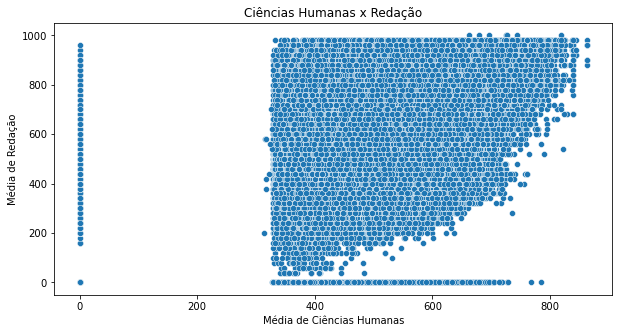

In [75]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_enem, x='NU_NOTA_CH', y='NU_NOTA_REDACAO',palette='mako');
plt.title('Ciências Humanas x Redação')
plt.ylabel('Média de Redação')
plt.xlabel('Média de Ciências Humanas');

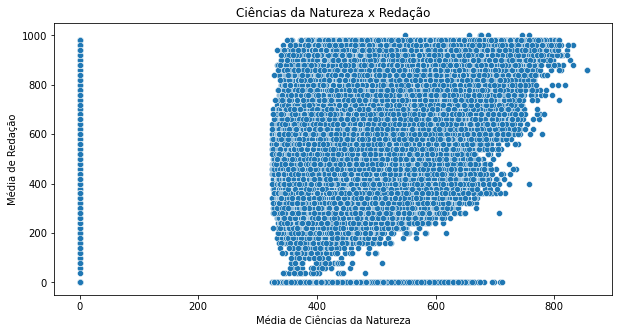

In [76]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_enem, x='NU_NOTA_CN', y='NU_NOTA_REDACAO',palette='mako');
plt.title('Ciências da Natureza x Redação')
plt.ylabel('Média de Redação')
plt.xlabel('Média de Ciências da Natureza');

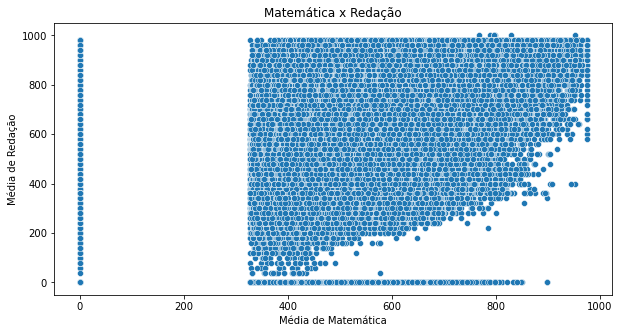

In [77]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_enem, x='NU_NOTA_MT', y='NU_NOTA_REDACAO',palette='mako');
plt.title('Matemática x Redação')
plt.ylabel('Média de Redação')
plt.xlabel('Média de Matemática');

In [78]:
df_enem.sort_values(by=['TP_COR_RACA'], inplace=True)

In [31]:
# 0	Não declarado
# 1	Branca
# 2	Preta
# 3	Parda
# 4	Amarela
# 5	Indígena 


In [79]:
df_enem['TP_COR_RACA'].loc[(df_enem['TP_COR_RACA'] == '0')] = 'Não Declarado'
df_enem['TP_COR_RACA'].loc[(df_enem['TP_COR_RACA'] == '1')] = 'Branca'
df_enem['TP_COR_RACA'].loc[(df_enem['TP_COR_RACA'] == '2')] = 'Preta'
df_enem['TP_COR_RACA'].loc[(df_enem['TP_COR_RACA'] == '3')] = 'Parda'
df_enem['TP_COR_RACA'].loc[(df_enem['TP_COR_RACA'] == '4')] = 'Amarela'
df_enem['TP_COR_RACA'].loc[(df_enem['TP_COR_RACA'] == '5')] = 'Indígena'

C:\Users\vitor\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


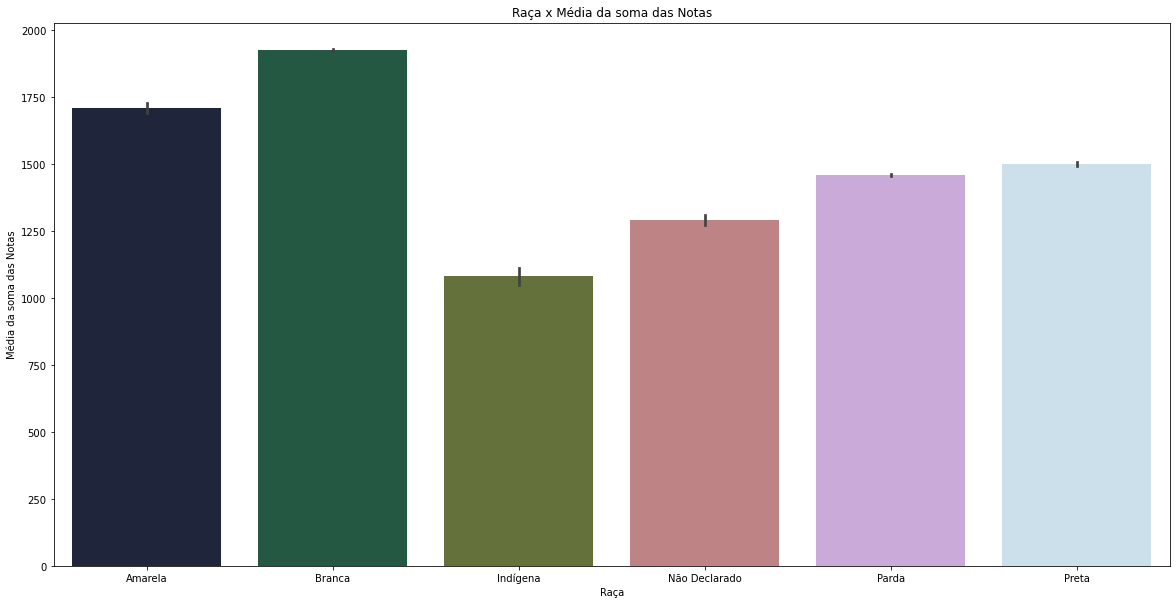

In [82]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_enem, x='TP_COR_RACA', y='Soma_Notas', palette='cubehelix');
plt.title('Raça x Média da soma das Notas')
plt.ylabel('Média da soma das Notas')
plt.xlabel('Raça');

<Figure size 1440x1440 with 0 Axes>

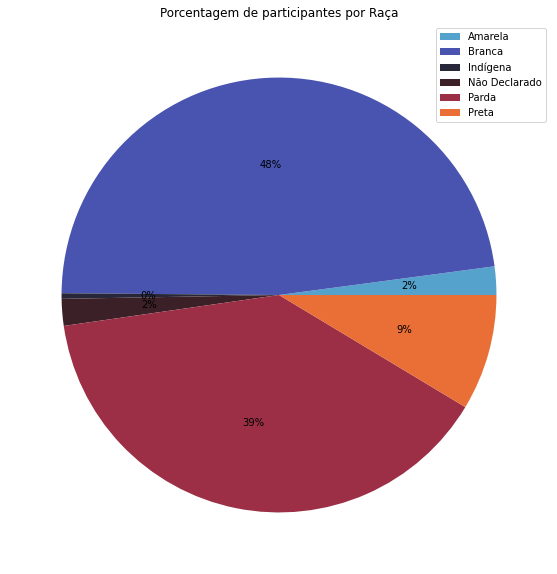

In [86]:
plt.figure(figsize=(20,20))
colors = sns.color_palette('icefire')
df_enem.groupby(['TP_COR_RACA']).sum().plot(y='Soma_Notas',colors=colors, kind='pie',autopct='%1.0f%%', 
                                            labeldistance=None , figsize=(20,10))
plt.title('Porcentagem de participantes por Raça')
plt.ylabel('')
plt.show();